### Google Play Store App EDA & Data Visualization

**Apps dataset columns descriptions:**

This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play</li>
</ul> 

In [3]:
import pandas as pd
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Understanding The Dataset

Show all columns of the dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Let's replace the space in the column names with an underscore.

For example, "Content Rating" will be "Content_Rating"

In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

Let's look at the number of rows and columns in the dataset. Show number of rows and columns.

In [11]:
print(df.shape)

(10841, 13)


Let me show the types of columns.

In [13]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

### Handling Missing Data

Let's have a look at missing data in columns. Show all columns with the number of missing data.

In [16]:
missing_data = df.isnull().sum()
print(missing_data)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64


Let's use the median value for missing data in the rating column. Note that the median is more robust than the mean for the outlier values.

In [168]:
median_rating = df['Rating'].median()

df['Rating'].fillna(median_rating)

print(df['Rating'].isnull().sum())


0


Let's remove the other missing data as it is very little.

In [20]:
df.dropna(inplace=True)

Let's take a look at missing data again.

In [22]:
missing_data_after = df.isnull().sum()

In [23]:
print(missing_data_after)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64


### Data Preprocessing

## <font color='coral'><b>Handling the review column</b><font color='black'>     

Let's convert the type of reviews into integer.

In [27]:
df["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [28]:
df['Reviews'] = df['Reviews'].astype(int)

In [29]:
print(df['Reviews'].dtype)

int32


#### Handling the size column

How many unique values "Size" column has?

In [32]:
df['Size'].nunique()

457

Show all unique values in "Size" column

In [34]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Let's remove the 'M' and 'k' characters in the "Size" column values.

In [36]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  
    else:
        return None  

df['Size'] = df['Size'].apply(lambda x: convert_size(x) if x != 'Varies with device' else None)

print(df['Size'].head())


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


Show again all unique values of the "Size" column values

In [38]:
df['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 5.50000000e+00, 1.70000000e+01,
       3.90000000e+01, 3.10000000e+01, 4.20000000e+00, 7.00000000e+00,
       2.30000000e+01, 6.00000000e+00, 6.10000000e+00, 4.60000000e+00,
       9.20000000e+00, 5.20000000e+00, 1.10000000e+01, 2.40000000e+01,
                  nan, 9.40000000e+00, 1.50000000e+01, 1.00000000e+01,
       1.20000000e+00, 2.60000000e+01, 8.00000000e+00, 7.90000000e+00,
       5.60000000e+01, 5.70000000e+01, 3.50000000e+01, 5.40000000e+01,
       1.96289062e-01, 3.60000000e+00, 5.70000000e+00, 8.60000000e+00,
       2.40000000e+00, 2.70000000e+01, 2.70000000e+00, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

Let's replace the string "Depends on device" with the median of the size column. To do this, let's first calculate the median of the size.

In [40]:
median_size = df['Size'].median()
median_size

13.0

Now let's replace the string "Depends on device" with the median of the size column

In [42]:
df['Size'].fillna(median_size)

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839    13.0
10840    19.0
Name: Size, Length: 10829, dtype: float64

Let's convert this "Size" column into numeric.

In [44]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
print(df['Size'].isnull().sum())
print(df['Size'].dtype)

1694
float64


In [45]:
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [46]:
df.Size.describe().round()

count    9135.0
mean       22.0
std        23.0
min         0.0
25%         5.0
50%        13.0
75%        30.0
max       100.0
Name: Size, dtype: float64

## <font color='coral'> <b>Handling the installs column</b> <font color='black'>   

In [48]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

Let's remove the '+', ',' symbols in this column values.

In [50]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

Show again unique values of "Installs" column.

In [52]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

#### Handling the price column

Show all unique values of Price column.

In [55]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Let's remove the $ symbol in this column.

In [57]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

Show again all unique values of Price column.

In [59]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

#### Handling the genres column

Write a code to see how many unique values "Genres" column has

In [62]:
df["Genres"].nunique()

119

In [63]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

The data is divided between genre and subgenre, let's only set by genre. Get genre by gettinf from first part of splitting by ';'. And replace all values in "Genres" column

In [65]:
df['Genres'] = df['Genres'].str.split(';').str[0]


Again, check the number of unique values of the Genres column.

In [67]:
df["Genres"].nunique()

48

Show all unique values of Genres column

In [69]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

Show value counts of "Genres" column, i.e. list all genres and their quantities.

In [71]:
df['Genres'].value_counts()

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

Let's combine the music & audio with the music. So replace "Music & Audio" with "Music" in "Genres" column.

In [73]:
df['Genres'] = df['Genres'].replace('Music & Audio', 'Music')
print(df['Genres'].value_counts())

Genres
Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
H

#### Handling the last updated column

In [75]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

Convert "Last_Updated" column to datetime by using pandas function to_datetime.

In [122]:
df['Last_Updated'] = pd.to_datetime(df['Last_Updated'])

Let's take a look at the dataset after EDA. Show first five columns of the df dataset.

In [125]:
print(df['Last_Updated'].head())

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]


Show datatypes of the dataset by columns.

In [128]:
print(df['Last_Updated'].dtype)

datetime64[ns]


### Data Visualization

#### Bar plot for the type column

Import matplotlib.pyplot as plt.

In [130]:
import matplotlib.pyplot as plt

Show the number of each unique values of "Type" column using barplot. So, the plot on X-axis should have 'Free' and 'Paid' values. On Y-axis should have the number of 'Free' and 'Paid' values. Don't forget to add title 'Free & Paid Barplot'

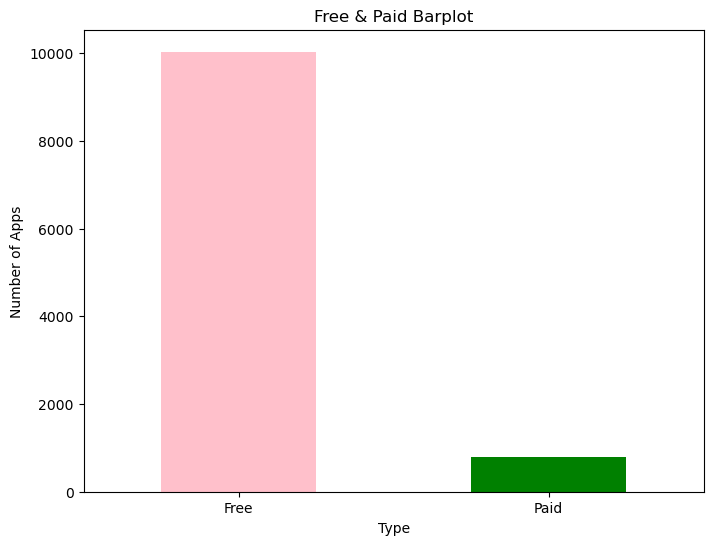

In [136]:
type_counts = df['Type'].value_counts()

plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['pink', 'green'])

plt.title('Free & Paid Barplot')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.xticks(rotation=0)

plt.show()

Which apps are more: Free apps or Paid apps? It should free apps.

Yes. Free apps are more that Paid.

#### Box plot for the rating column

Let's use seaborn library. First, import it.

In [140]:
import seaborn as sns

In [141]:
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

Let's plot boxplot: on Y-axis - "Rating", on X-axis - "Type" column. Put the title "Content rating with their counts"

Text(0, 0.5, 'Rating')

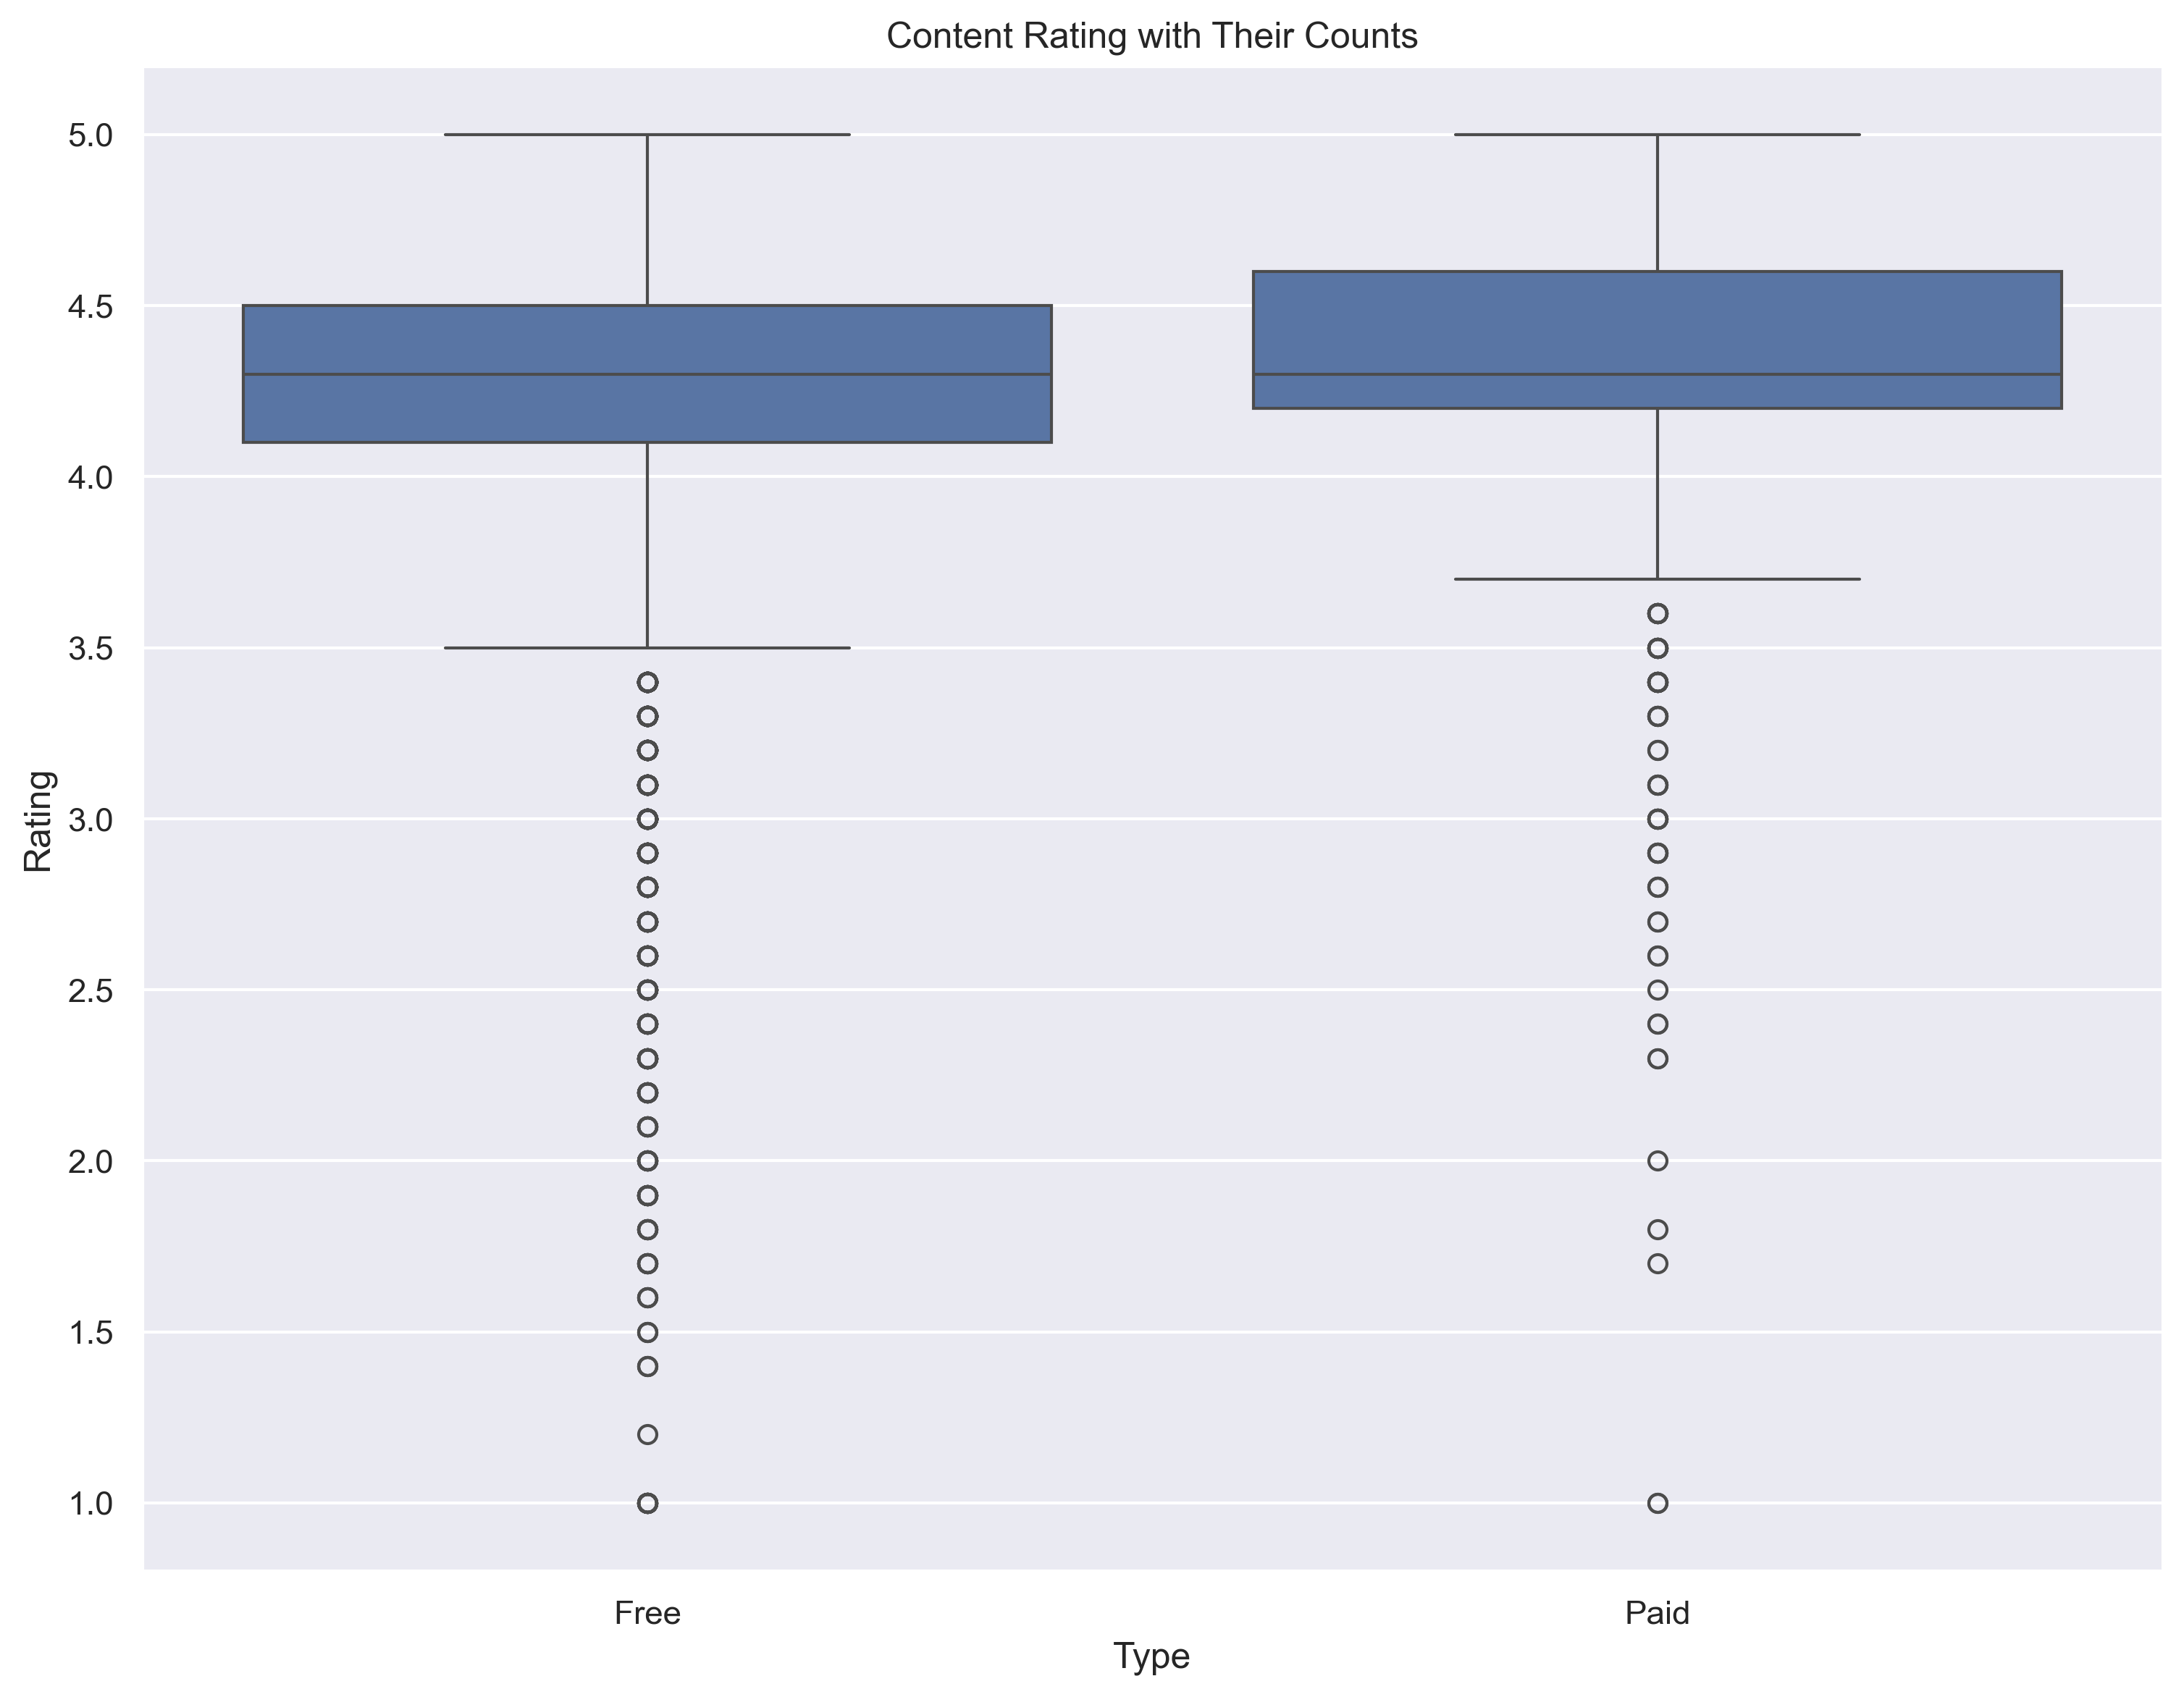

In [146]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='Type', y='Rating', data=df)

plt.title('Content Rating with Their Counts')
plt.xlabel('Type')
plt.ylabel('Rating')

As we see, the average rating of paid apps is higher.

#### Bar plot for the rating column with the number of the categories

Plot countplot on "Content_Rating" column. Put title "Content rating with their counts"

C:\Users\Kuralay\AppData\Local\Temp\ipykernel_2144\737751170.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content_Rating', data=df, palette='viridis')


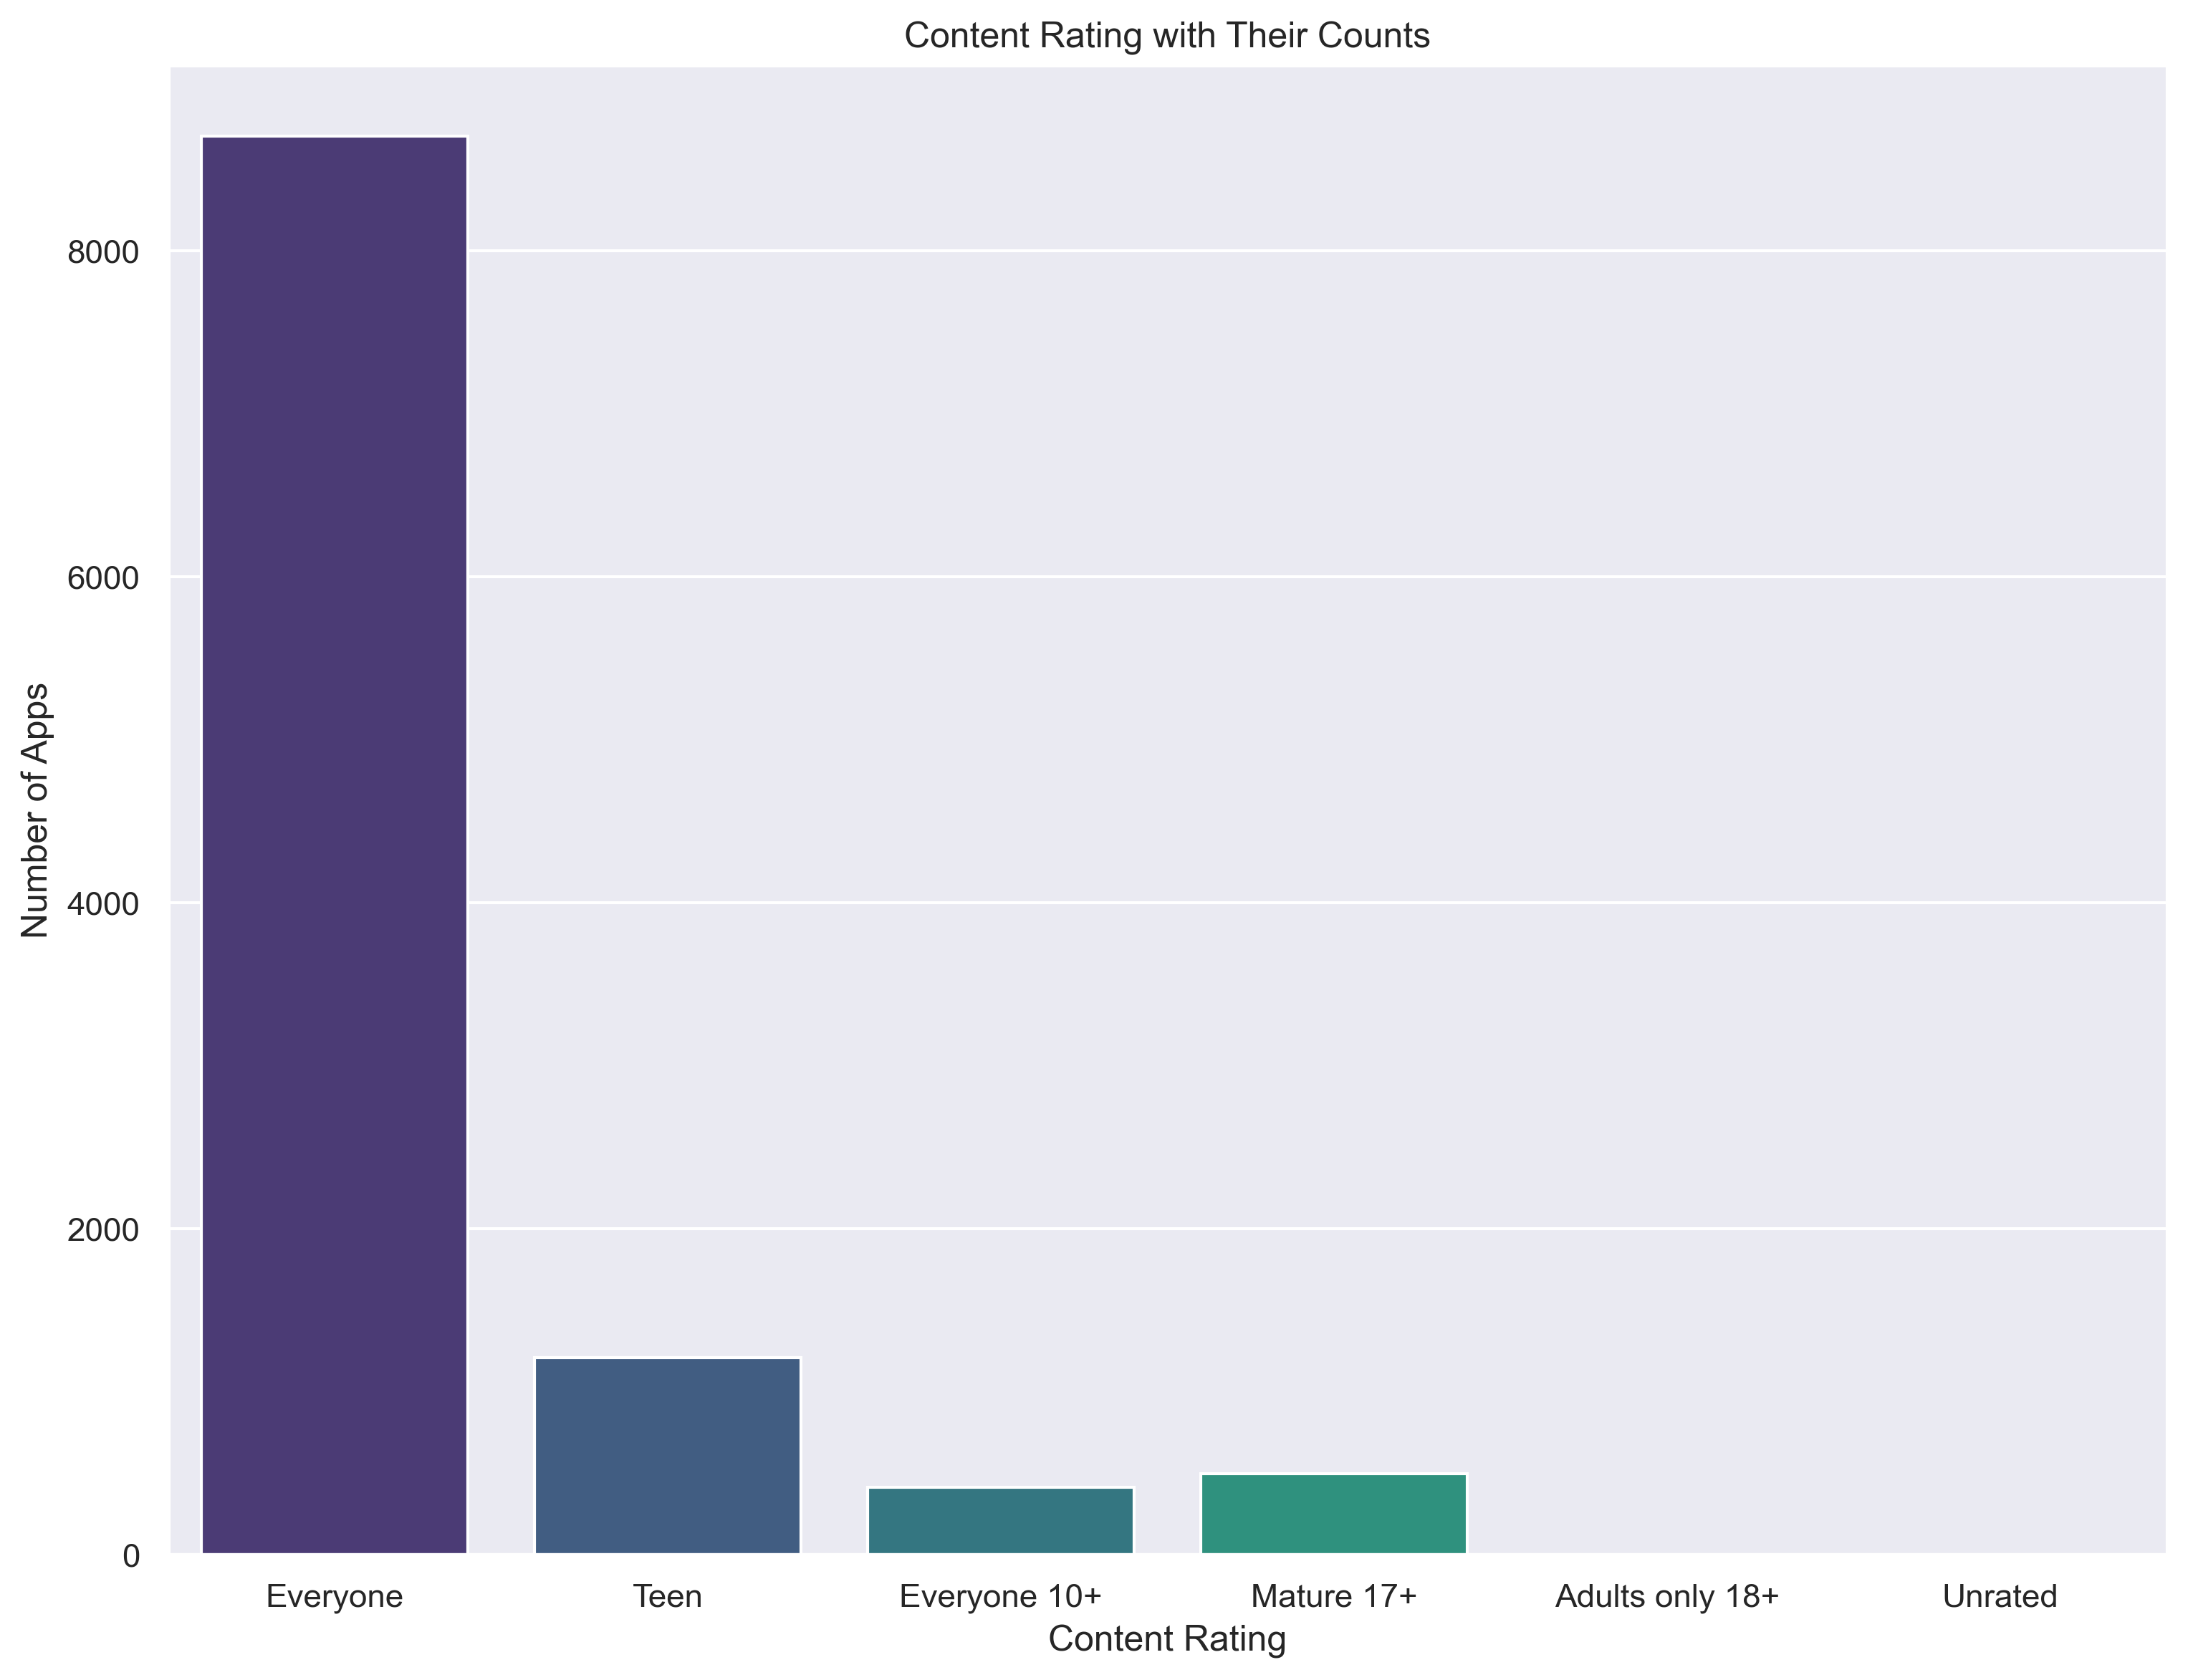

In [148]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

plt.figure(figsize=(12, 9))
sns.countplot(x='Content_Rating', data=df, palette='viridis')

plt.title('Content Rating with Their Counts')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')

plt.show()

As you can see, the most apps are in the Everyone category, then comes Teen.

#### Box plot for the content rating and rating

Now, plot boxplot where Y-axis is "Rating" and X-axis is "Content_Rating". Put title "The content rating & rating" with size of 20.

C:\Users\Kuralay\AppData\Local\Temp\ipykernel_2144\3977686850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content_Rating', y='Rating', data=df, palette='viridis')


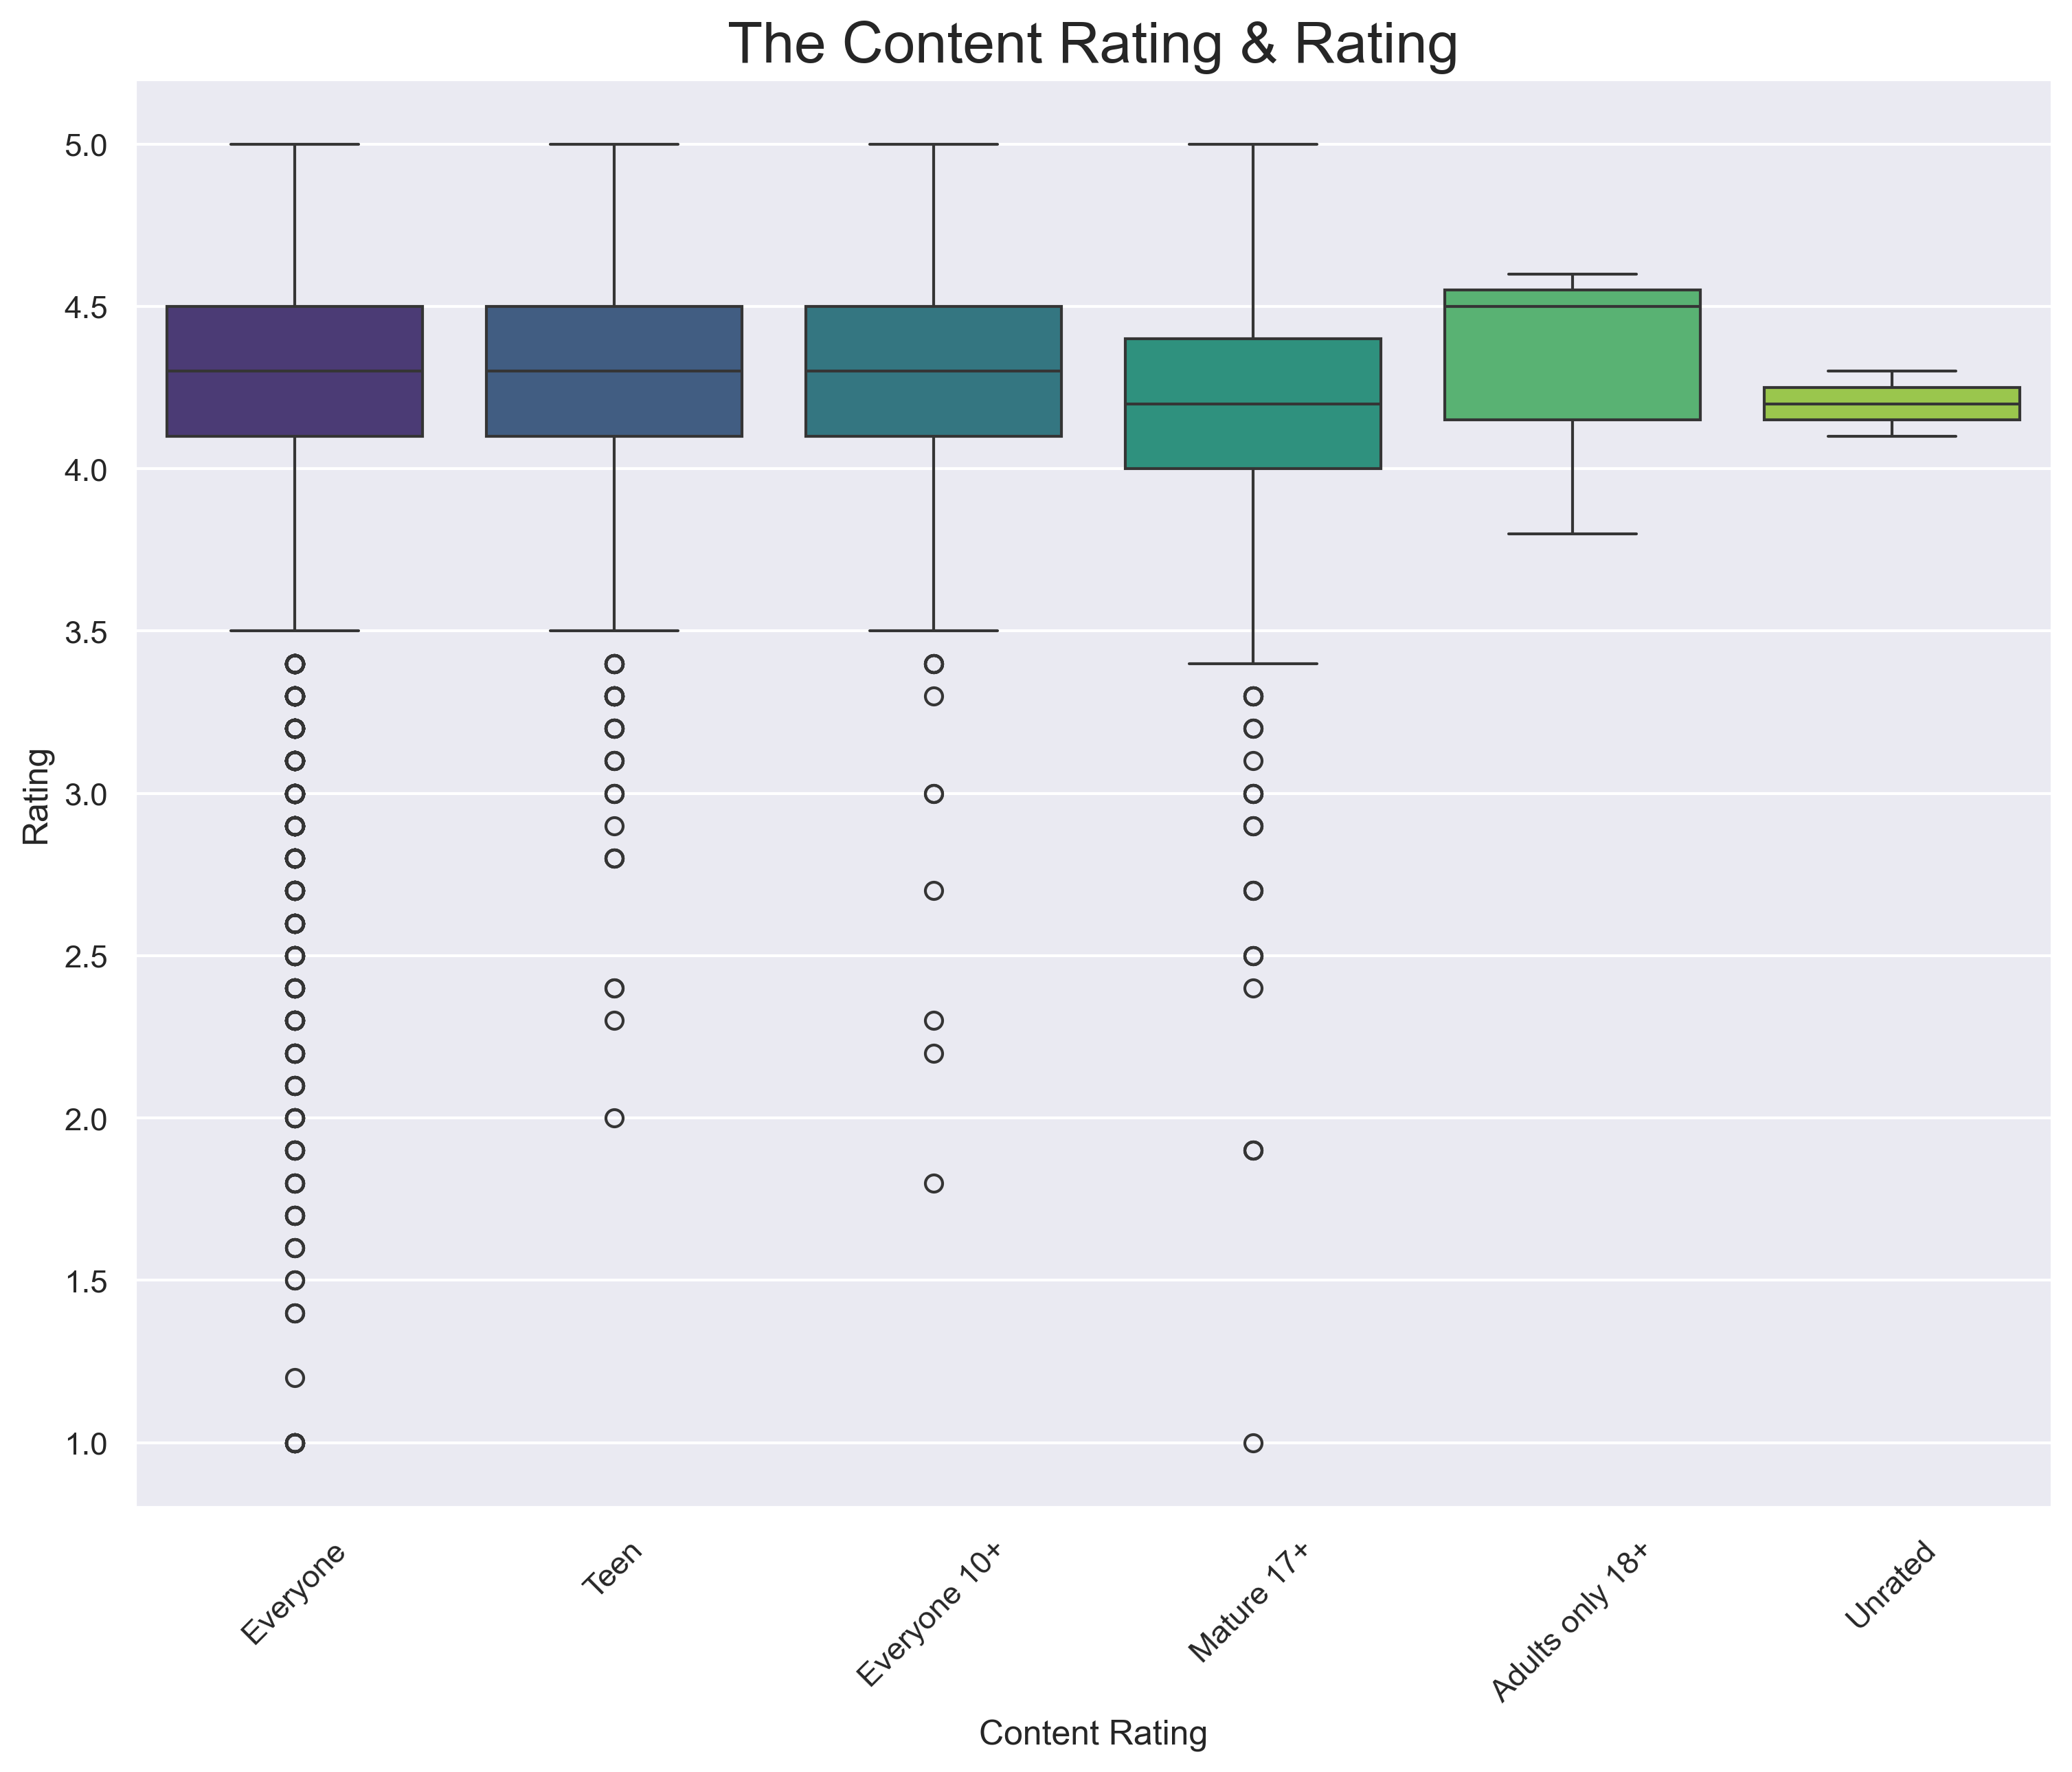

In [152]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

plt.figure(figsize=(12, 9))
sns.boxplot(x='Content_Rating', y='Rating', data=df, palette='viridis')

plt.title('The Content Rating & Rating', fontsize=20)
plt.xlabel('Content Rating')
plt.ylabel('Rating')

plt.xticks(rotation=45)  
plt.show()

As you can see, the ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.

#### Bar plot for the category column with the number of the categories

Now, plot barplot on value counts of "Category" column. For every unique values of the "Category" column, count their values. And plot barplot on this information. Put title "The number of categories" with size of 20.

C:\Users\Kuralay\AppData\Local\Temp\ipykernel_2144\855413244.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


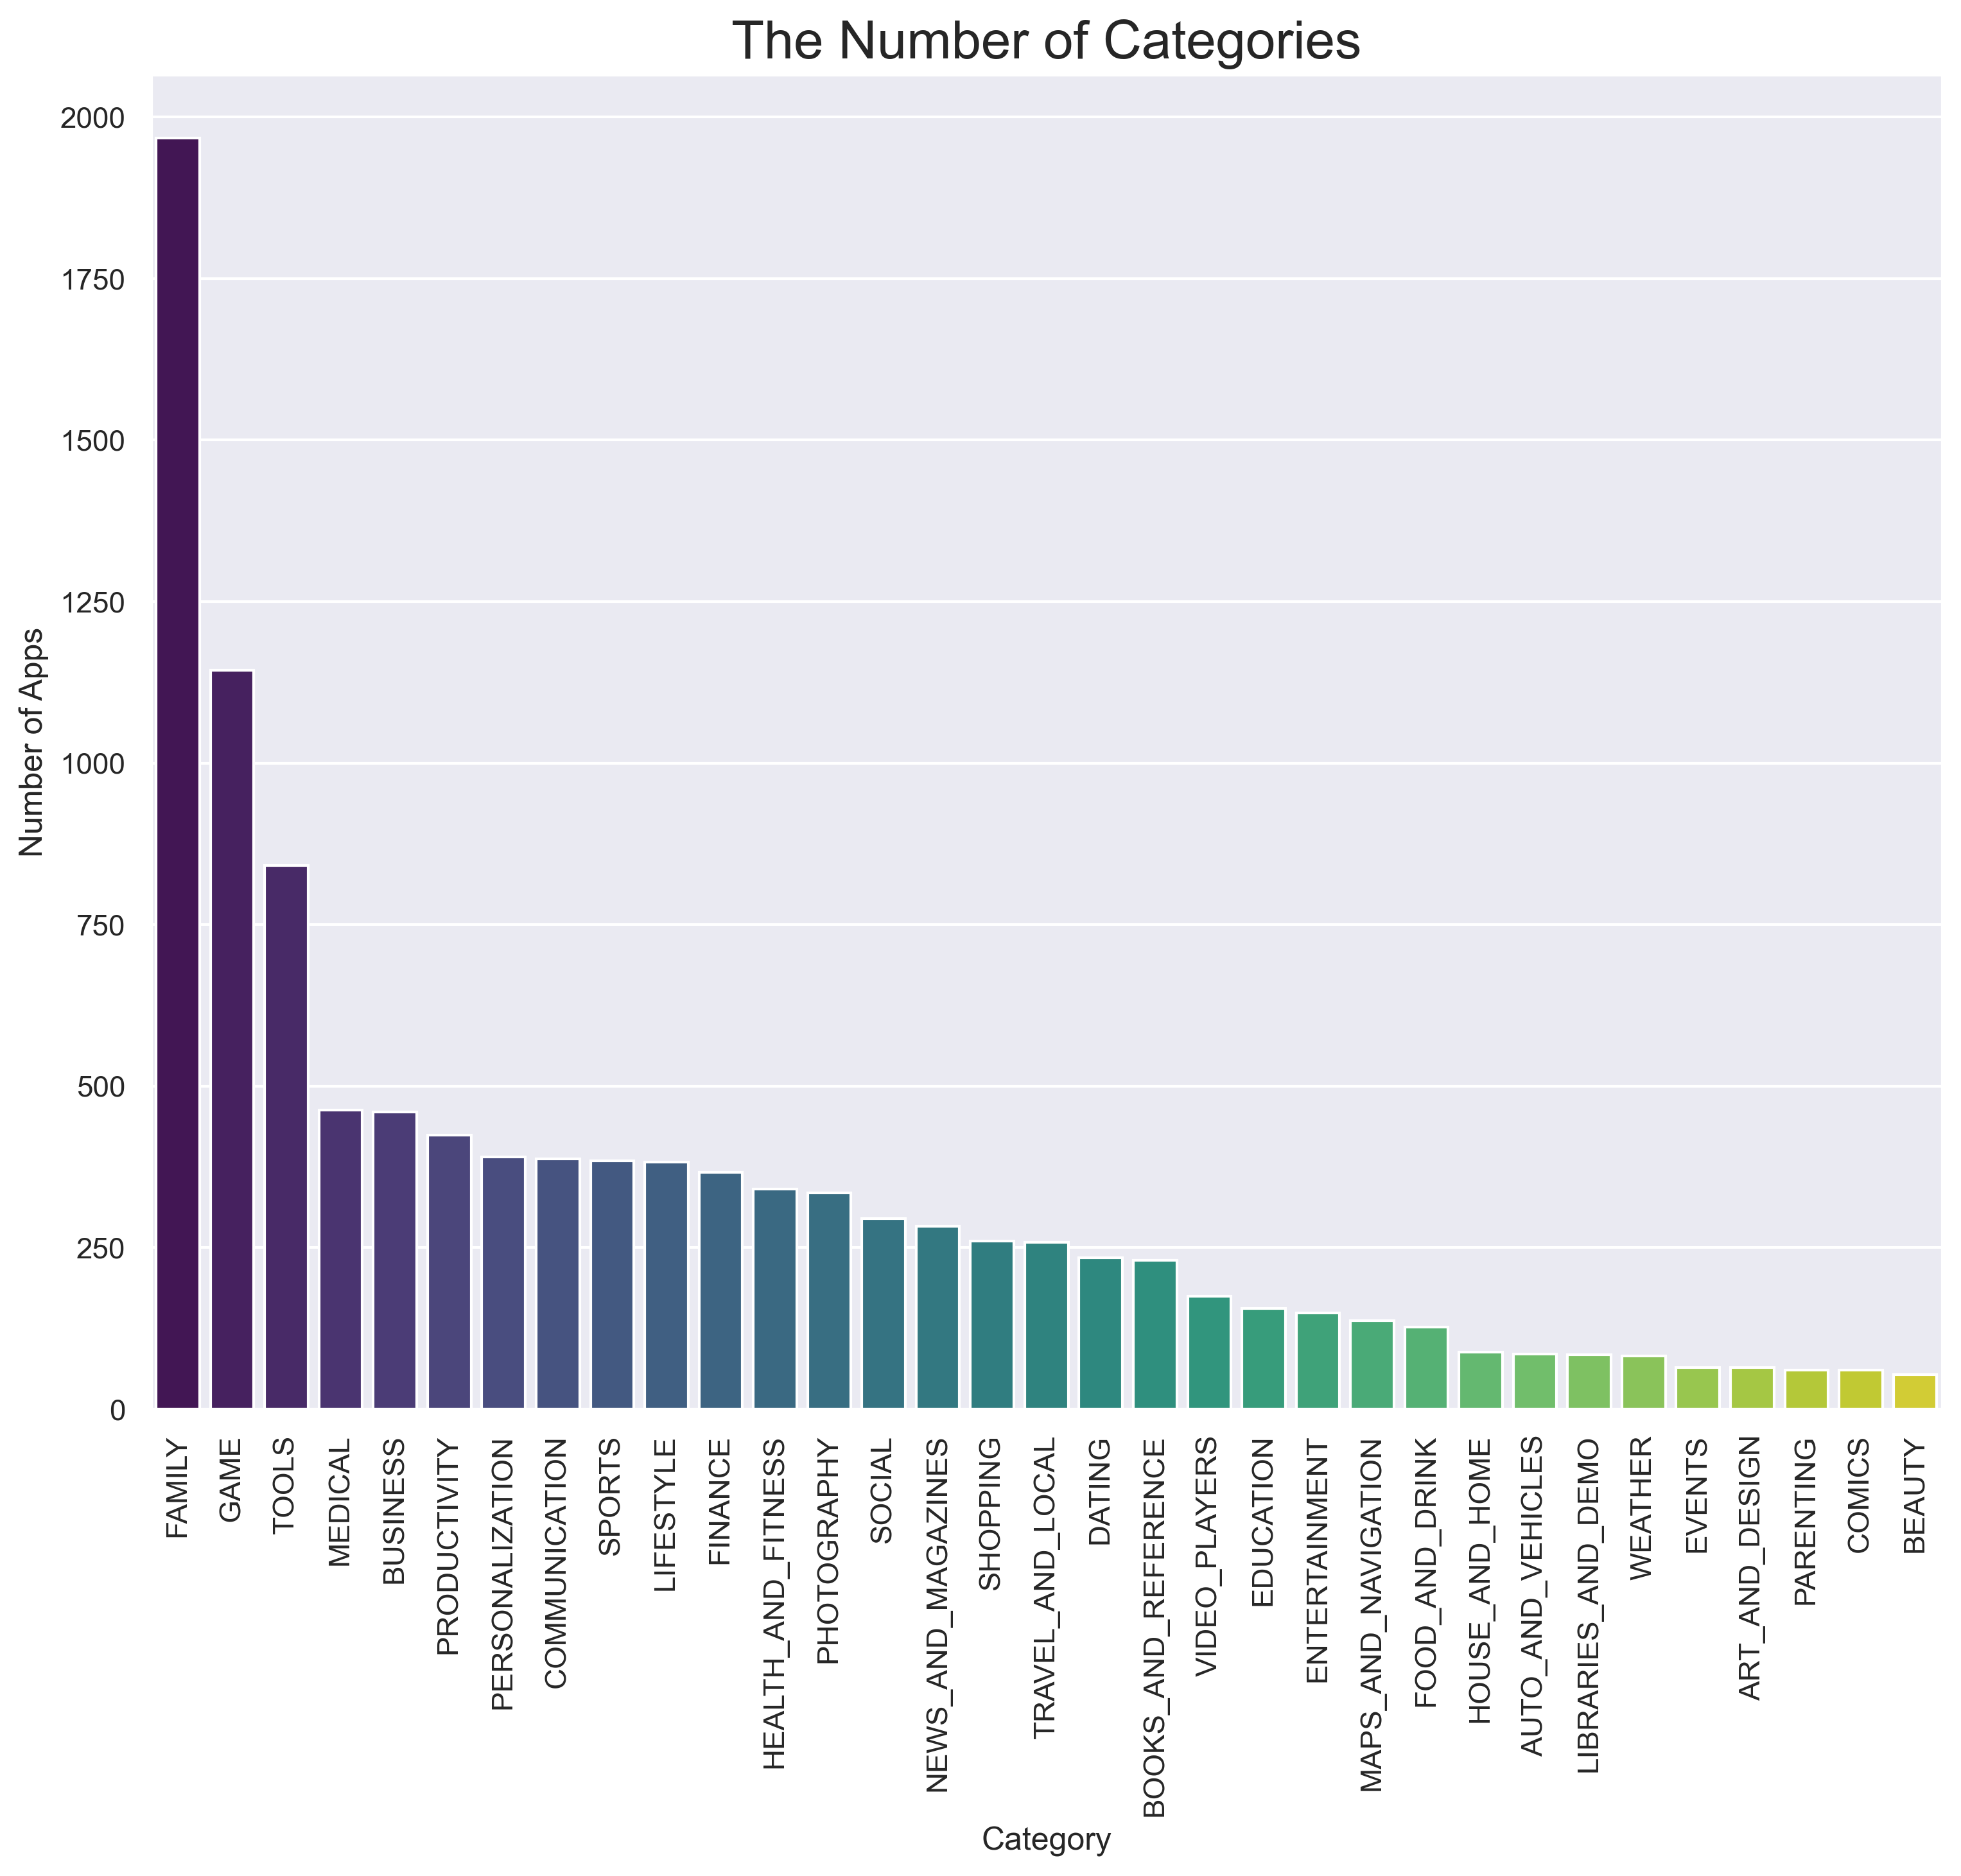

In [156]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

category_counts = df['Category'].value_counts()

plt.figure(figsize=(12, 9))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.title('The Number of Categories', fontsize=20)
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.xticks(rotation=90)

plt.show()

The most applications are in the family category, then the game, then tools.

#### Scatter plot for the category and price

Draw scatter plot of "Category" vs "Price" (i.e. X-axis: "Price", Y-axis: "Category"). Name the plot "Category & Price" with size of 20.

C:\Users\Kuralay\AppData\Local\Temp\ipykernel_2144\2714207439.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Price', y='Category', data=df, palette='viridis')


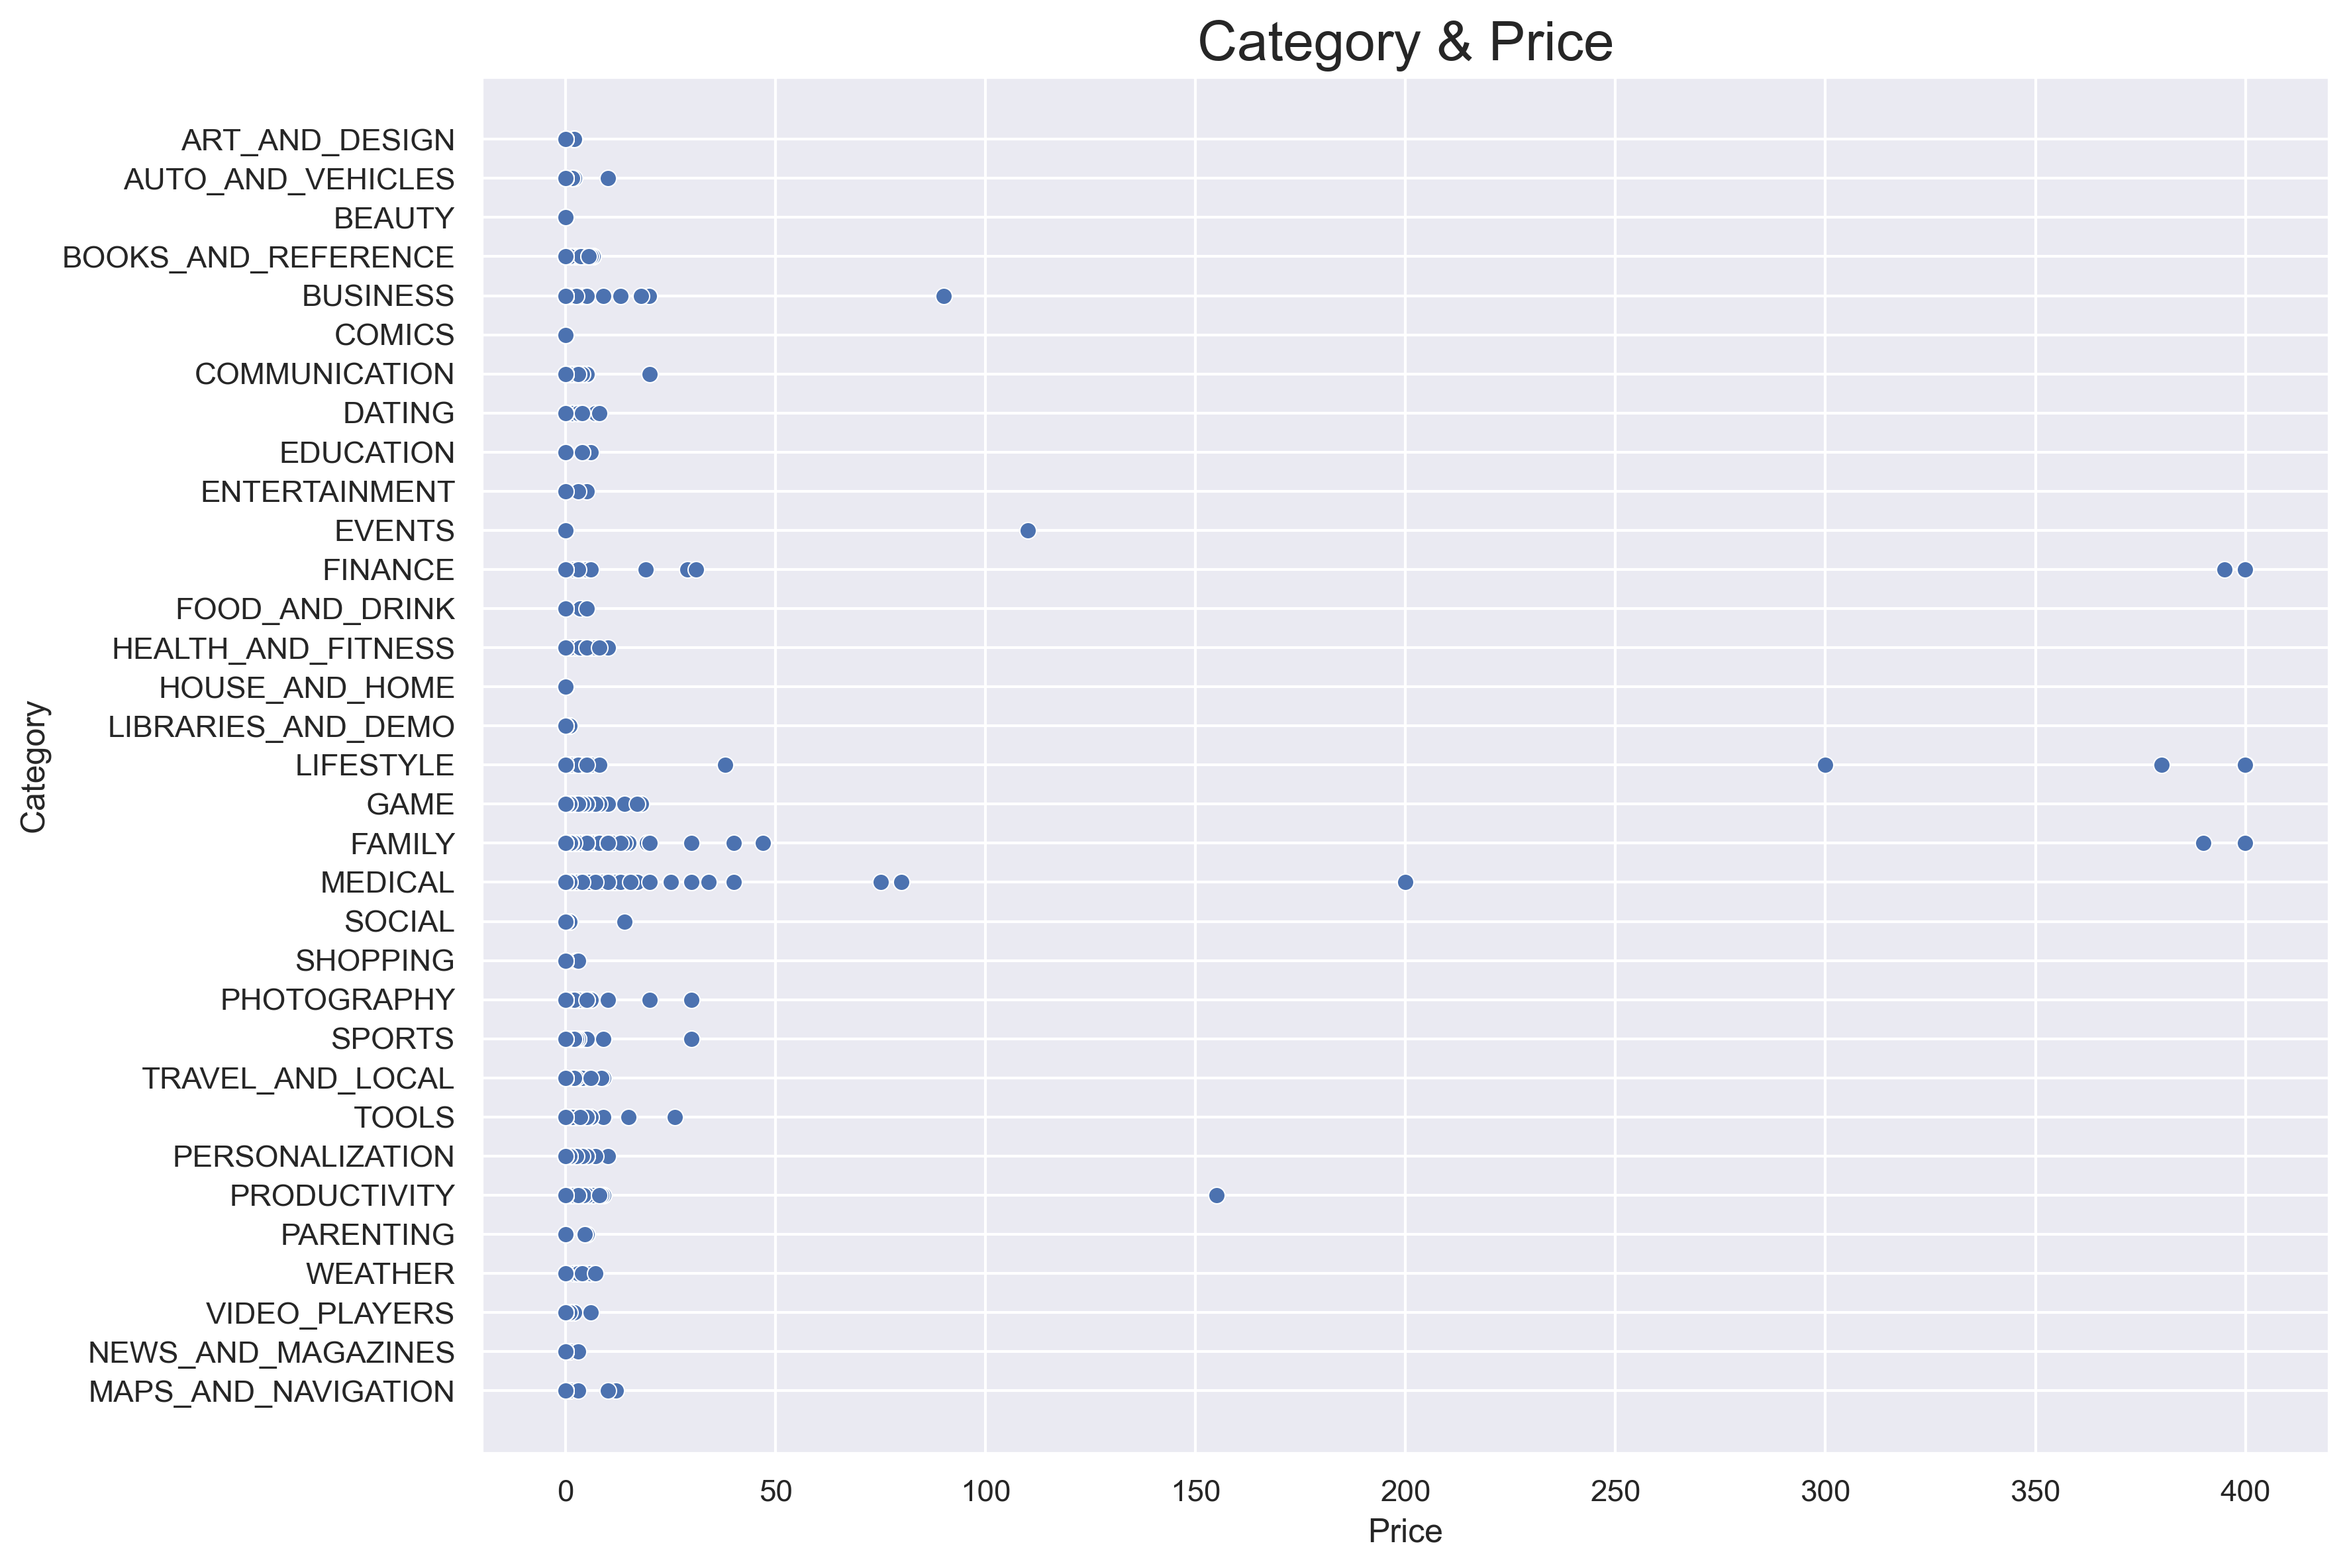

In [162]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

plt.figure(figsize=(12, 9))
sns.scatterplot(x='Price', y='Category', data=df, palette='viridis')

plt.title('Category & Price', fontsize=20)
plt.xlabel('Price')
plt.ylabel('Category')

plt.show()

Notice that the highest paid applications are finance, lifestyle, and family.

#### Histogram with the kde for the rating column

Plot histplot of "Rating" column with kde = True. Put title "Histogram with the kde for the rating column" with size of 20.

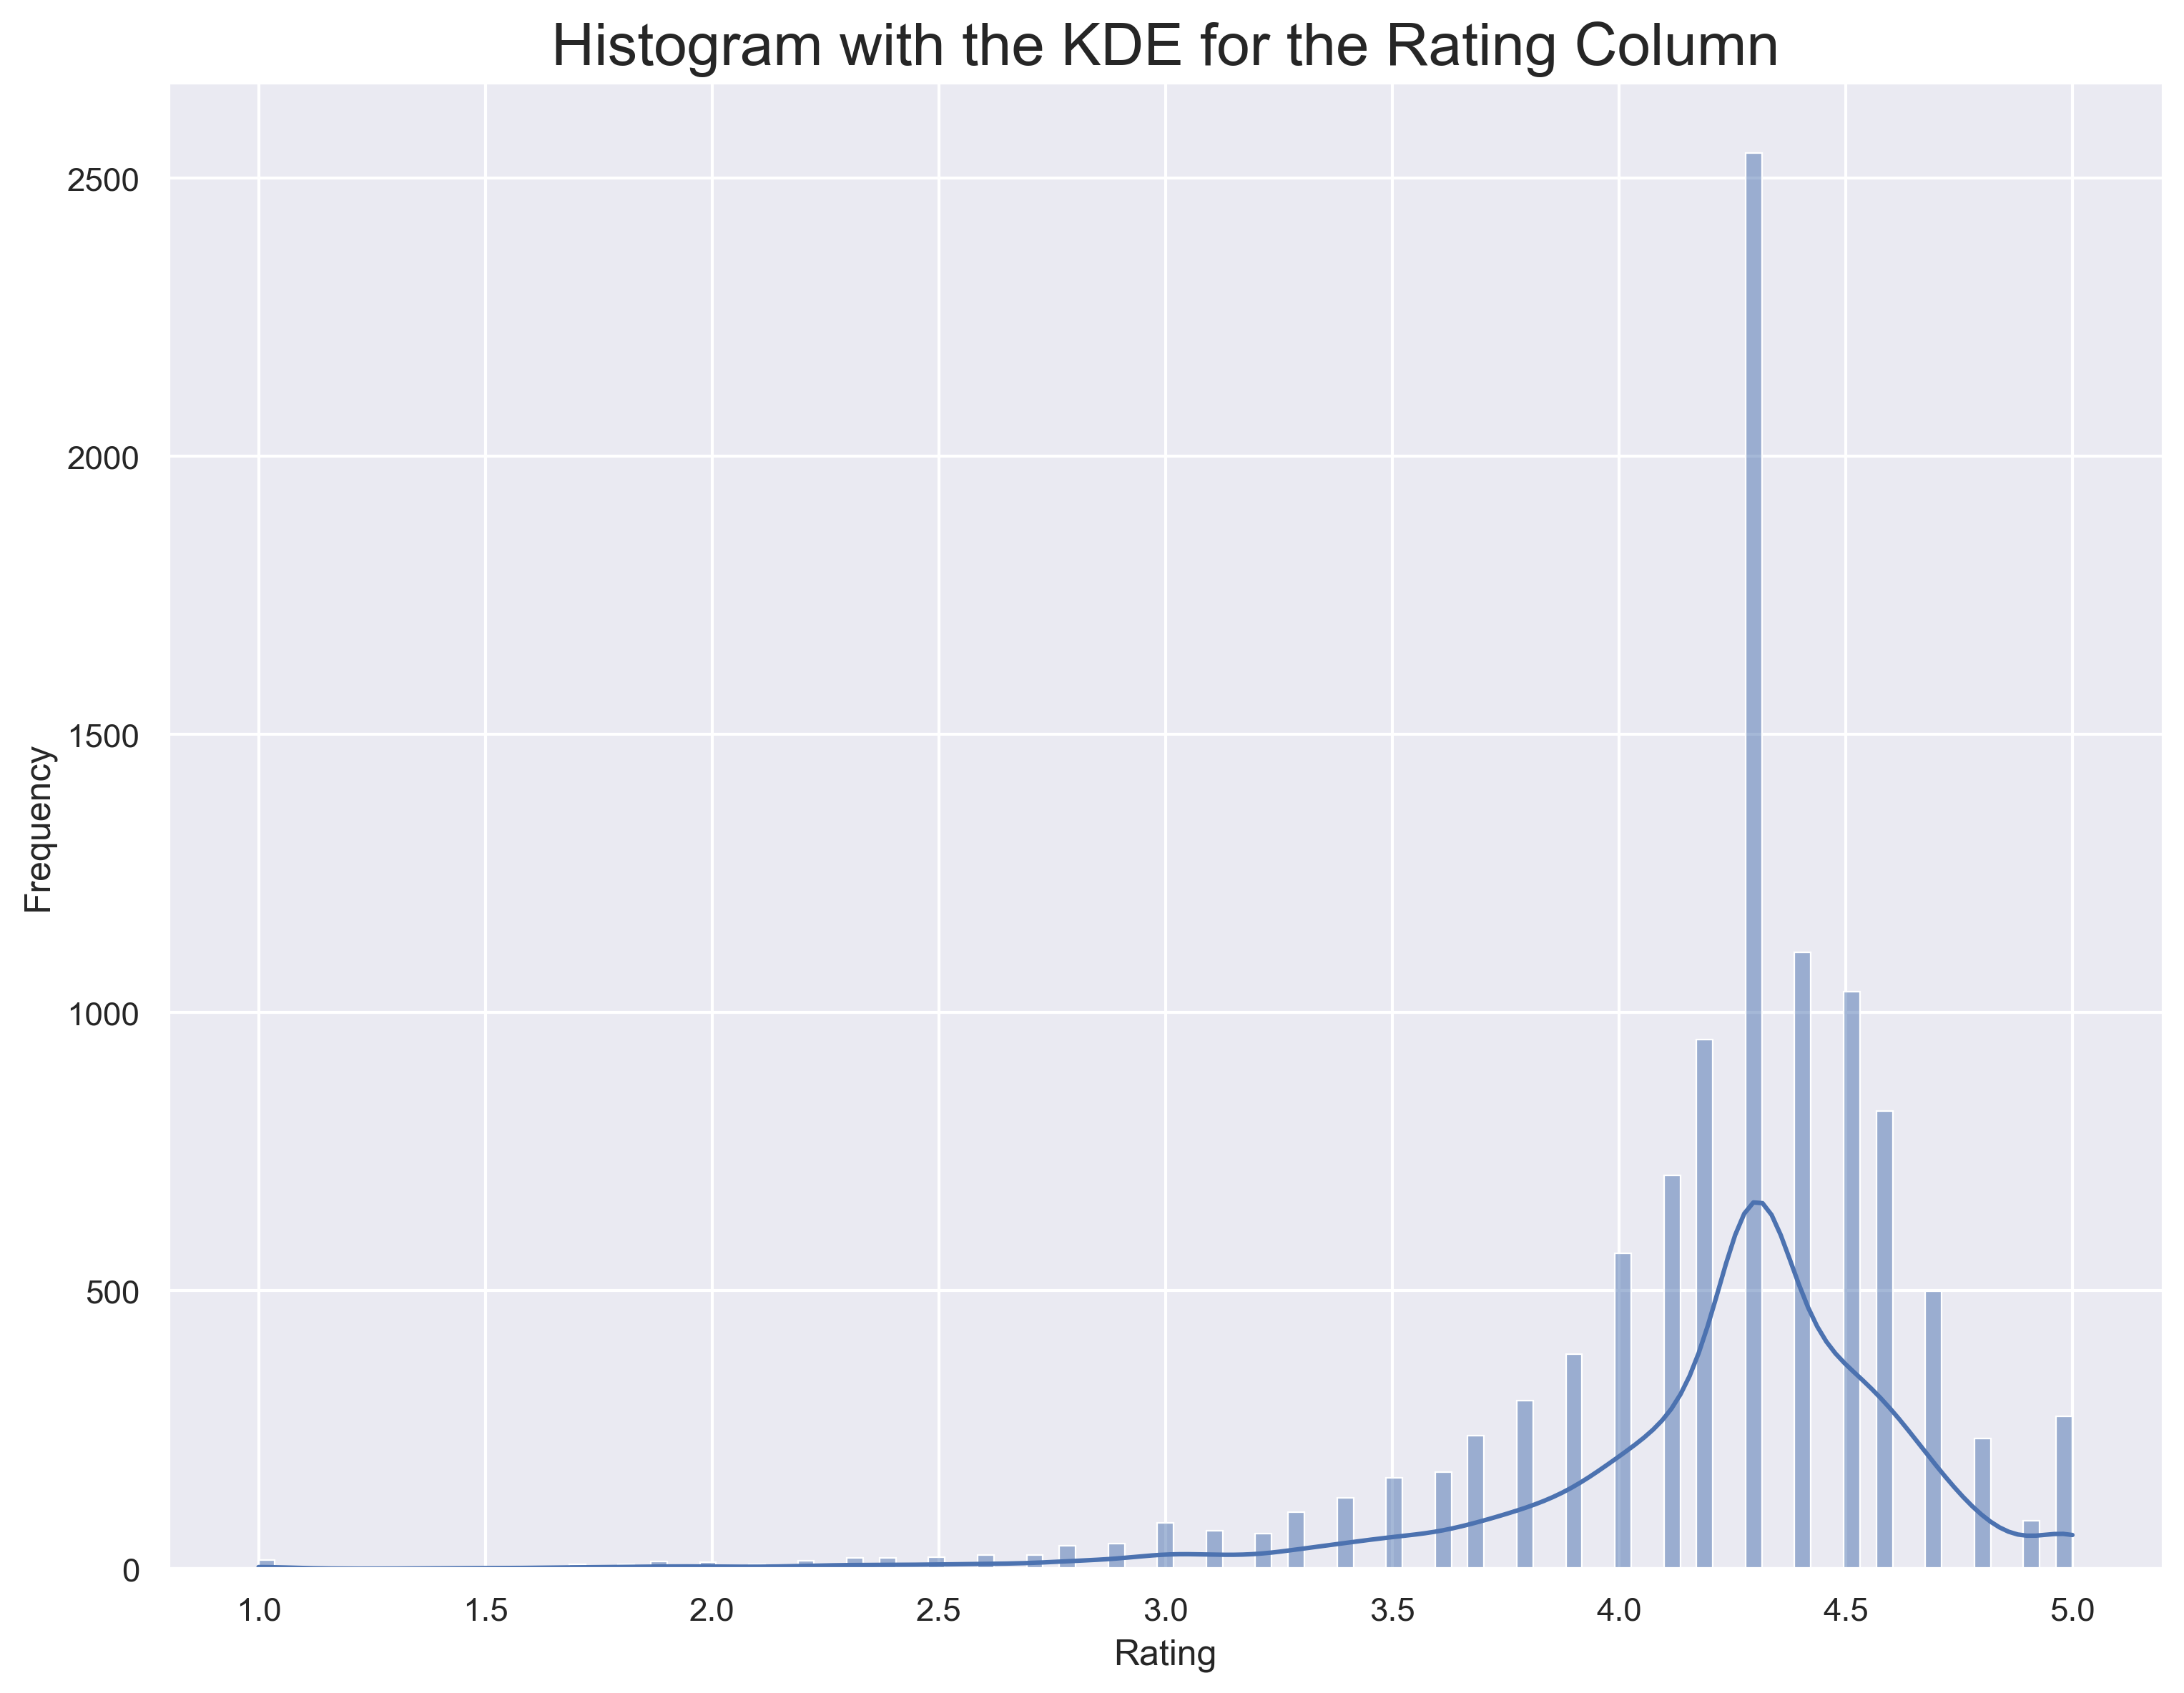

In [166]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

plt.figure(figsize=(12, 9))
sns.histplot(df['Rating'], kde=True)

plt.title('Histogram with the KDE for the Rating Column', fontsize=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

As you can see, the most values are distributed around 4.3.

Well Done. Finished.